# Homework #2:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/9/2020|

## The Quadratic Equation

The roots of a quadratic polynomial,

\begin{equation}
ax^2 + bx + c, \quad a\neq0,
\tag{1}
\end{equation}

can be found analytically with either of the following two formulas:

\begin{equation}
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a},
\tag{2}
\end{equation}

\begin{equation}
x^\prime_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4ac}},
\tag{3}
\end{equation}

where
\begin{equation}
b^2 - 4ac
\tag{4}
\end{equation}

is the ***discriminant***. A quadratic polynomial, with _real_ coefficients $a, b,$ and $c$, has two distinct real roots if the discriminant is positive and two complex roots if it is negative. The two roots are equal if and only if the discriminant is zero.

### A. Functions to Calculate
Let's first write two separate functions to calculate and return the real quadratic roots given by Eqs. 2 and 3.

In [29]:
import math

def quadroots1(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 2).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots1(coeff)
    [1.0, -1.0]
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        
        x = (-b + math.sqrt(disc))/2/a
        roots = [x]
        if disc > 0:               # two distinct real roots       
            x = (-b - math.sqrt(disc))/2/a
            roots.append(x)
        return roots

In [30]:
import math

def quadroots2(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 3).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots2(coeff)
    [1.0, -1.0]
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        elif disc == 0 and b == 0:
            return [0]             # avoid division by zero
        else:
            x = -2*c/(b + math.sqrt(disc))
            roots = [x]
            if disc > 0:               # two distinct real roots       
                x = -2*c/(b - math.sqrt(disc))
                roots.append(x)
            return roots

We can test these solvers out with a simple example. First let's graph

\begin{equation}
f(x) = x^2 - 1,
\tag{5}
\end{equation}

where our quadratic coefficients (Eq. 1) are

\begin{align*}
a &= 1\\
b &= 0\\
c &= -1.
\end{align*}

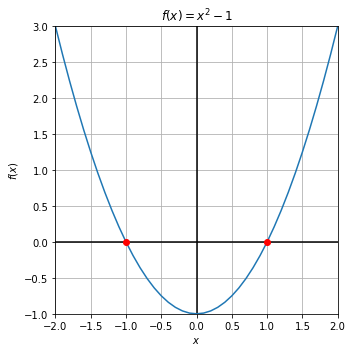

In [23]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x*x - 1
x = np.arange(-2, 2.1, 0.1)

plt.figure(figsize=[5,5])
plt.title(r'$f(x) = x^2 - 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axhline(color='k')
plt.axvline(color='k')
plt.grid()
plt.plot(x, f(x))
plt.plot(-1.,0, 'or')
plt.plot(1.,0, 'or')
plt.xlim([-2,2])
plt.ylim([-1,3])
plt.tight_layout()
plt.show()

As we can see, we expect to find roots at $x=-1$ and $x=1$. Now let's try our new solvers to verify they're working correctly.

In [27]:
# declare coeff's
coeff = [1, 0, -1]
print("Eq. 2 roots at x  =", quadroots1(coeff))
print("Eq. 3 roots at x' =", quadroots2(coeff))

Eq. 2 roots at x  = [1.0, -1.0]
Eq. 3 roots at x' = [1.0, -1.0]


So far so good.

### B. Error Investigation
Careful inspection of Eqs. 2 and 3 reveals a potential source of significant error due to _substractive cancellation_ in the limit where $b^2 \gg 4ac$. For example&mdash;depending on the root&mdash;we effectively find in the numerator and denominator of Eqs. 2 and 3 respectively,

\begin{align*}
b - \sqrt{b^2 - 4ac} &= \lim_{c \rightarrow 0} b - \sqrt{b^2}\\
&= \lim_{c \rightarrow 0} b - b.
\end{align*}

We can get a handle on how substantial this error can become as the subtractive cancelation begins to dominate; for example, when $a=1, b=1, c=10^{-n}$, $n \in \mathbb{N^*}$, for successively larger $n$. But in order to quantify this error due to subtractive cancellation, we first need a methodology for calculating the _exact_ difference.

#### Binomial Series
If $k$ is any number and $|x| < 1$ then,

\begin{align*}
{\left( {1 + x} \right)^k} & = \sum\limits_{n = 0}^\infty  { {k \choose n} {x^n}} \,\\ &  = 1 + kx + \frac{{k\left( {k - 1} \right)}}{{2!}}{x^2} + \frac{{k\left( {k - 1} \right)\left( {k - 2} \right)}}{{3!}}{x^3} +  \cdots,
\tag{6}
\end{align*}

where the _binomial coefficient_ is given by

\begin{align*}
{k \choose n} & = \frac{{k\left( {k - 1} \right)\left( {k - 2} \right) \cdots \left( {k - n + 1} \right)}}{{n!}}\hspace{0.25in}n = 1,2,3, \ldots \\ {k \choose 0} & = 1.
\end{align*}

For Eqs. 2 and 3, we can re-express the square root of the discriminant as Eq. 6, with $b = b^2 = 1$, $-4ac = x$, and $1/2 = k$, as

\begin{align*}
{\left( {1 + x} \right)^{1/2}} & = \sum\limits_{n = 0}^\infty  { {1/2 \choose n} {x^n}} \,\\ &  = 1 + \frac{1}{2}x + \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)}}{{2!}}{x^2} + \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)\left( {\frac{1}{2} - 2} \right)}}{{3!}}{x^3} +  \cdots\\
&  = 1 + \frac{1}{2}x - \frac{1}{8}{x^2} + \frac{3}{48}{x^3} +  \cdots,
\tag{7}
\end{align*}

where,

\begin{align*}
{1/2 \choose n} & = \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)\left( {\frac{1}{2} - 2} \right) \cdots \left( {\frac{1}{2} - n + 1} \right)}}{{n!}}\hspace{0.25in}n = 1,2,3, \ldots \\
\end{align*}


Thus, for example, if our coefficients are $a=1, b=1,$ and $c=10^{-1}=\frac{1}{10}$, then in Eq. 7,

\begin{align*}
x &= -4(1)\left(\frac{1}{10}\right)\\
&= -\frac{4}{10}\\
&= -\frac{2}{5},
\end{align*}
and the square root of the determinant becomes

\begin{align*}
{\left( {1 - \frac{2}{5}} \right)^{1/2}} &= 1 - \frac{1}{2}\left(\frac{2}{5}\right) + \frac{1}{8}{\left(\frac{2}{5}\right)^2} - \frac{3}{48}{\left(\frac{2}{5}\right)^3} +  \cdots\\
&= 1 - \frac{1}{5} + \frac{1}{50} - \frac{1}{250} +  \cdots\\
&\approx 0.816 
\end{align*}



In [36]:
np.sqrt(0.6)

0.7745966692414834

In [33]:
2/5

0.4

In [34]:
1-0.4

0.6

In [35]:
.6**.5

0.7745966692414834

In [31]:
(1-(2/5))**.5

0.7745966692414834

In [32]:
import math

math.sqrt(1-(2/5))

0.7745966692414834

In [37]:
quadroots1([1,1,0.1])

[-0.1127016653792583, -0.8872983346207417]

In [38]:
import math

def binomial(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 3).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots2(coeff)
    [1.0, -1.0]
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        elif disc == 0 and b == 0:
            return [0]             # avoid division by zero
        else:
            x = -2*c/(b + math.sqrt(disc))
            roots = [x]
            if disc > 0:               # two distinct real roots       
                x = -2*c/(b - math.sqrt(disc))
                roots.append(x)
            return roots

### First with $n$ = 1, 3, 5

In [4]:
x = np.arange(-np.pi, np.pi, 0.01)
y1 = f(x, 1)
y3 = f(x, 3)
y5 = f(x, 5)

xticks = np.arange(-np.pi, np.pi+np.pi/4, np.pi/4)
xlabels = [r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',
           r'$-\pi/4$',0,r'$\pi/4$',
           r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
yticks = np.arange(-2*np.pi, 2*np.pi+np.pi/4, np.pi/4)
ylabels = [r'$-2\pi$',r'$-7\pi/8$',r'$-3\pi/2$',r'$-5\pi/4$',
           r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',r'$-\pi/4$',0,
           r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$',
           r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/8$',r'$2\pi$',]

plt.figure(figsize=[5,10])
plt.title(r'$f(x)$ for various $n$')
plt.xlabel(r'$x$')
plt.xlim(-np.pi,np.pi)
plt.xticks(xticks, xlabels)
plt.ylabel(r'$f(x)$')
plt.ylim(-2*np.pi,2*np.pi)
plt.yticks(yticks, ylabels)
plt.grid()
plt.plot(x, y1, label=r'$n=1$')
plt.plot(x, y3, label=r'$n=3$')
plt.plot(x, y5, label=r'$n=5$')
plt.legend(loc="best")
plt.show()

TypeError: <lambda>() takes 1 positional argument but 2 were given